# Visualizing Trends in COVID-19 Cases Using Johns Hopkins Data by County

## import relevant libararies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## function *graph_county* 
### 1) pulls COVID-19 case data from Johns Hopkins
### 2) cleans/formats the data
### 3) visualizes our data using matplotlib

In [2]:
def graph_county(state, county, num_days=30):
    """
    Function that will plot the cumulative number of cases over the last N number of days 
    :state: state of choice
    :county: county of choice
    :num_days: number of days for graph to display, default set to 30
    """
    # Read in the file from Johns Hopkins and load into pandas
    url_confirmed_us = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
    confirmed_us_df = pd.read_csv(url_confirmed_us)
    # drop columns not needed for graphing 
    state_county = confirmed_us_df.drop(['UID','Country_Region','iso2','iso3','code3','FIPS','Lat','Long_'], axis=1)
    # rename column 'Admin2' to 'County'
    state_county.rename(columns={'Admin2':'County'},inplace=True)
    
    # Generate a dataframe that consists of one row for the specified county
    county_df = state_county[(state_county['Province_State'] == state) & (state_county['County'] == county)]
    
    # drop columns and transpose the dataframe
    county_df = county_df.drop(['County', 'Province_State','Combined_Key'], axis=1)
    county_df = county_df.reset_index(drop=True)
    county_df.rename(index={0:'Cases'},inplace=True)
    county_df = county_df.T
    
    # graphing
    county_df.tail(num_days).plot(kind='bar',figsize=(18.5, 10.5))
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    title = 'Number of Cases Over the Last ' + str(num_days) + ' Days in ' + county + ', ' + state 
    plt.title(title)
    plt.legend().remove()
    plt.xticks(rotation=40)
    
    
    return county_df

## Interactive function that creates and visualizes the graph
### Inputs: state, county, and time period to visualize
### Outputs: chart with covid cases over the last n days

In [3]:
def show_graph():
    state = input("Enter your state: ")
    county = input("Enter your county (e.g. 'San Francisco'): ")
    num_days = int(input("Enter the time period you want to see (in days): "))
    
    graph = graph_county(state, county, num_days)
    return 

## calling our function to generate the chart 

Enter your state: California
Enter your county (e.g. 'San Francisco'): Los Angeles
Enter the time period you want to see (in days): 45


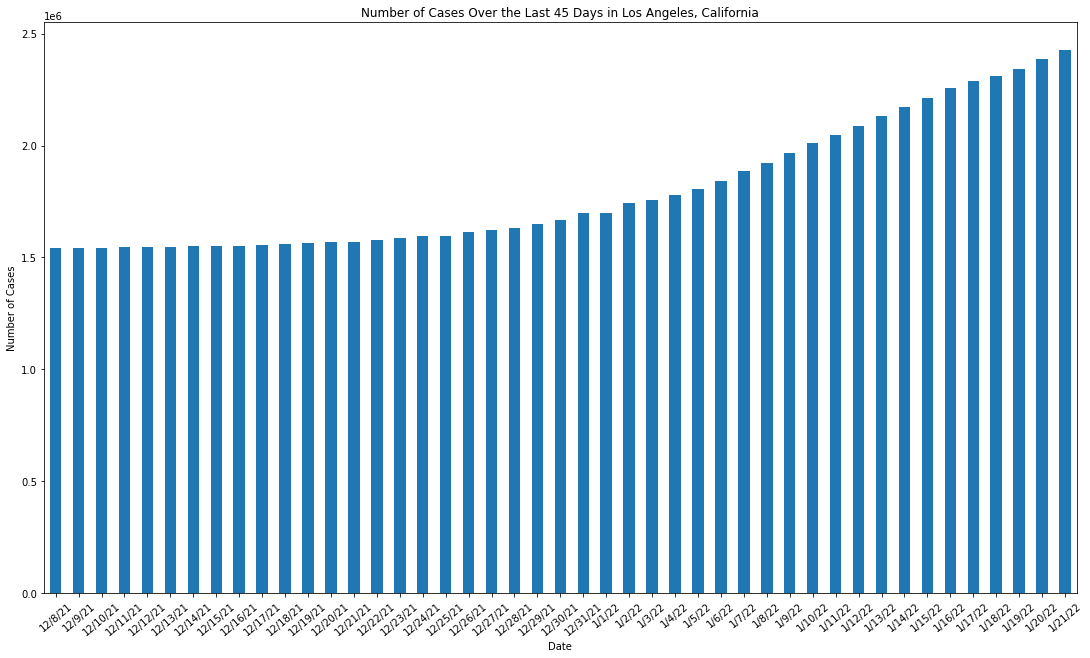

In [4]:
show_graph()

##### fin :) 